# Airbnb-Price-Prdeictions-Florida-Edition

## Summary
This notebook presents an analysis of Airbnb listing prices and explores different regression models to predict listing prices accurately.  

---

## Table of Contents

- [Intro](#Intro)
- [Modeling](#Linear-Regression)
- [Conclusion](#Conclusion)

---

## Imports

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [231]:
listings_scaled= pd.read_csv('../data/scaled_encoded_data.csv')

In [232]:
# Relevant features and target variable
target = 'price'
features = [col for col in listings_scaled.columns.tolist() if col != target]

X = listings_scaled[features]
y = listings_scaled[target]

In [233]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [234]:
# Compute the mean
target_mean = np.mean(y_train) 

In [235]:
# Baseline prediction
baseline_predictions = np.full_like(y_test, target_mean)  

In [236]:
# Evaluate the baseline
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)

print("Baseline MSE:", baseline_mse)
print("Baseline MAE:", baseline_mae)

Baseline MSE: 0.37874735662089654
Baseline MAE: 0.24130426677897318


**In the provided baseline prediction, the mean of the target variable, which is the 'price', is calculated from the training data. This average price is then used as the predicted value for all instances in the testing set**.

## Modeling

#### Linear Regression

In [237]:
# Scale the features
scaler = StandardScaler()

In [238]:
X_train_scaled = scaler.fit_transform(X_train)

In [239]:
X_test_scaled = scaler.transform(X_test)

In [240]:
# Impute missing values
imputer = SimpleImputer()

In [241]:
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [242]:
X_test_imputed = imputer.transform(X_test_scaled)

In [243]:
# Train the Linear Regression model
model = LinearRegression()

In [244]:
model.fit(X_train_imputed, y_train)

LinearRegression()

In [245]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
y_pred

array([-0.09894969,  0.15139745,  0.03036473, ...,  0.19014333,
        0.18730138, -0.17576758])

In [246]:
# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.9166089939199936e+21
Mean Absolute Error: 1294693798.883355


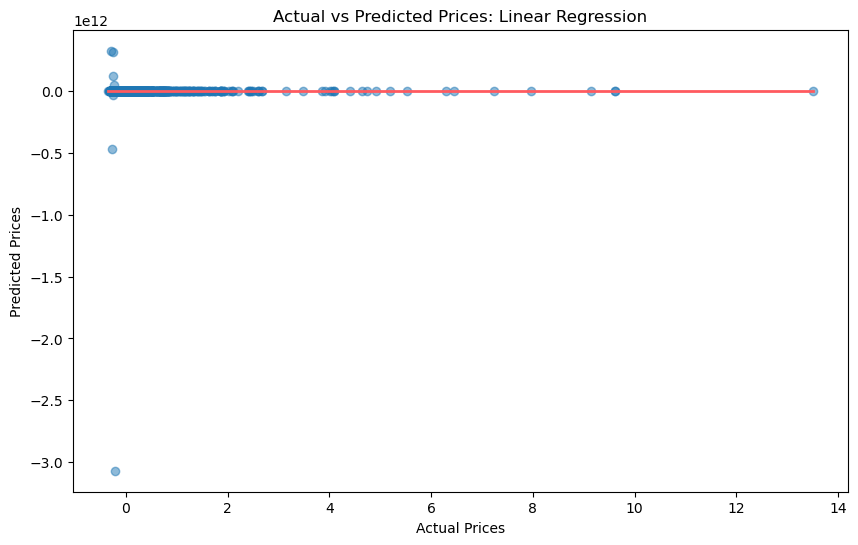

In [247]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices: Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FF5A5F', lw=2)
plt.show()



**This observation implies that the model is excessively capturing the noise present in the training data rather than accurately capturing the underlying pattern or trend**.

#### Gradient Boosting

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Handle missing values
imputer = SimpleImputer()

In [250]:
X_train_imputed = imputer.fit_transform(X_train)

In [251]:
X_test_imputed = imputer.transform(X_test)

In [252]:
# Train the model
model = GradientBoostingRegressor()
model.fit(X_train_imputed, y_train)

GradientBoostingRegressor()

In [253]:
# Predict on the test set
y_pred = model.predict(X_test_imputed)
y_pred

array([-0.2089706 ,  0.01510701, -0.02560542, ...,  0.1051113 ,
        0.13410013, -0.20816129])

In [254]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.22968092308811044
Mean Absolute Error: 0.15480950790476458


**The lower MSE and MAE values for the Gradient Boosting model imply that it outperforms the baseline model in predicting Airbnb listing prices, demonstrating its effectiveness in capturing the underlying patterns and trends that influence listing prices**

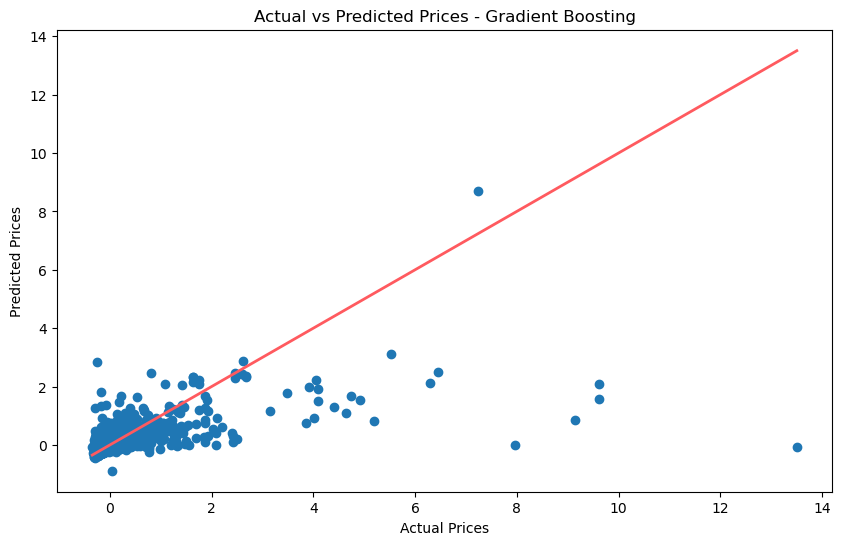

In [255]:
# Prediction vs Actual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#FF5A5F', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Gradient Boosting")
plt.savefig('../charts/prediction_vs_actual_Gradient.png')
plt.show()


**The tight clustering observed between the actual and predicted values for the range of $0 to $200 per night suggests that the Gradient Boosting model exhibits strong performance in predicting Airbnb listing prices within this specific price range. This indicates that the model effectively captures the underlying patterns and trends associated with listings in this price range**.

**The limited number of points on the diagonal line further indicates that the model's predictions closely align with the actual prices for these instances. This alignment demonstrates the model's ability to accurately estimate the prices for these specific listings**.

## LassoCV

In [256]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:
# Scale the features
scaler = StandardScaler()

In [258]:
X_train_scaled = scaler.fit_transform(X_train)

In [259]:
X_test_scaled = scaler.transform(X_test)

In [262]:
# Impute missing values
imputer = SimpleImputer()

In [ ]:
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [ ]:
X_test_imputed = imputer.transform(X_test_scaled)

In [261]:
# Train the LassoCV model
model = LassoCV(cv=5)

In [214]:
model.fit(X_train_imputed, y_train)

LassoCV(cv=5)

In [215]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

In [216]:
# Evaluate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.2704760668903026
Mean Absolute Error: 0.1826323691502641


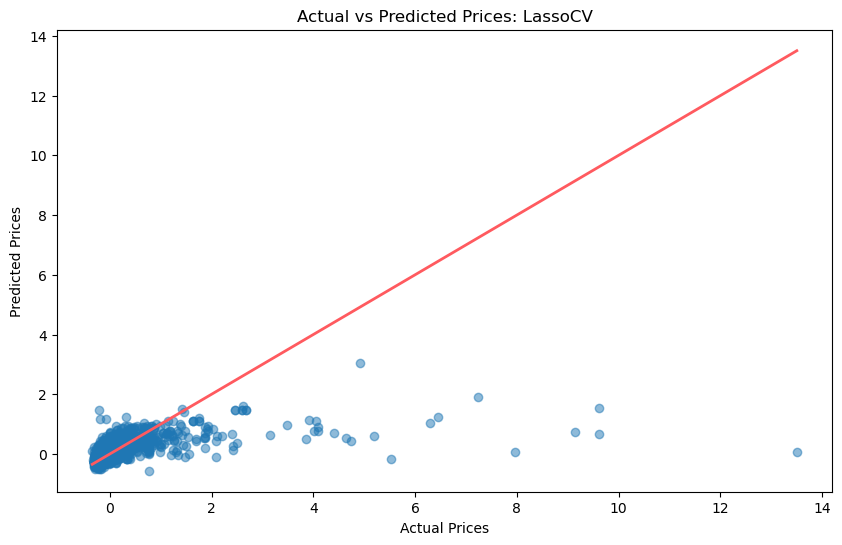

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices: LassoCV')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FF5A5F', lw=2)
plt.show()


## RidgeCV

In [218]:
# Define alphas
alphas = np.logspace(-4, 4, 9)

In [219]:
# RidgeCV model
ridge = RidgeCV(alphas=alphas, cv=5)

In [220]:
# Fit the model
ridge.fit(X_train_imputed, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
        cv=5)

In [221]:
print("Best alpha:", ridge.alpha_)

Best alpha: 1000.0


In [226]:
y_pred = ridge.predict(X_test_imputed)
y_pred

array([-0.11783526,  0.12642002,  0.03323843, ...,  0.17265404,
        0.17832469, -0.19648321])

In [227]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.2724799149439078
Mean Absolute Error: 0.18315609853587717


In [228]:
# 5-fold cross-validation
cv_scores = cross_val_score(ridge, X_train_imputed, y_train, cv=5)
cv_scores

array([0.31615793, 0.26557705, 0.26369301, 0.27178228, 0.01137522])

In [167]:
# Output cross-validation scores
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.31615793 0.26557705 0.26369301 0.27178228 0.01137522]
Mean cross-validation score (5-fold): 0.226


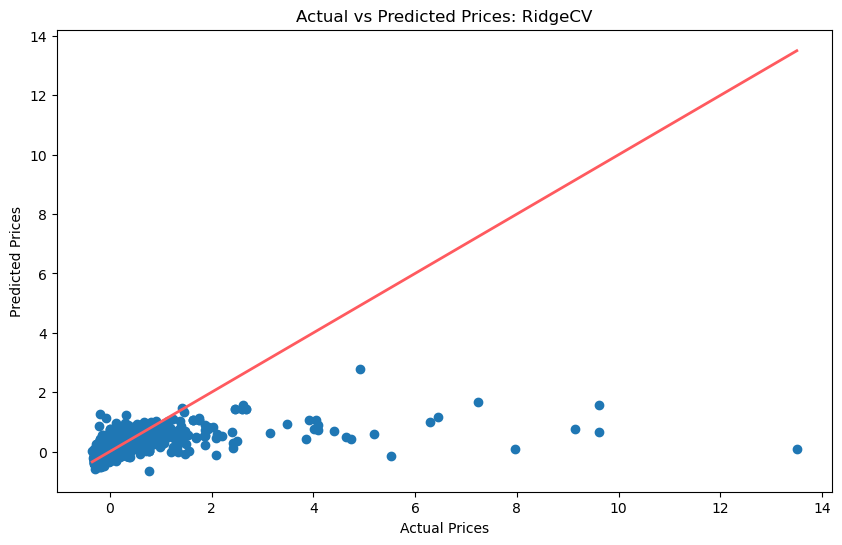

In [179]:
# Prediction vs Actual plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#FF5A5F', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices: RidgeCV")
plt.show()


## Conclusion

**The Gradient Boosting model performs the best among the models evaluated, with the lowest MSE and MAE values. It shows a significant improvement over the baseline model, indicating its effectiveness in predicting Airbnb listing prices. The LassoCV and RidgeCV models also outperform the baseline, but they have slightly higher MSE and MAE values compared to the Gradient Boosting model. The Linear Regression model performs poorly with extremely high MSE and MAE values, suggesting overfitting or other issues with the model**.

**Therefore, the Gradient Boosting model is the recommended choice for predicting Airbnb listing prices based on the given performance metrics**.